In [2]:
import networkx as nx
import graph_tool.all as gt
import numpy as np
from matplotlib import pyplot as plt

In [20]:
class sbm:
    
    def __init__(self, graph):
        
        self.g = graph
        
    def fitSBM(self, deg_corr_1 = False, verbose_1 = False, wait_1 = 10, nbreaks_1 = 2, n = 10, verbose_2 = False):
        """
        Fit a nested SBM to graph
        Pass arguments to graph-tools minimize_nested_blockmodel_dl
        """
        
        state = gt.minimize_nested_blockmodel_dl(self.g,deg_corr = deg_corr_1,verbose = verbose_1, 
                                           mcmc_equilibrate_args = dict(wait = wait_1, nbreaks = nbreaks_1, 
                                                                        mcmc_args = dict(niter = n), verbose = verbose_2))
        return state
        
    def blackAssignment(self, state):
        """
        After fitting SBM to graph, take output from fitSBM() to get block assignment
        for each node
        """
    
        return state.get_bs()
        
    def sbmplot(self,state):
        
        state.draw(edge_color = gt.prop_to_size(graph.ep.weight, power = 1, log = True), ecmap = (plt.cm.inferno, .6),
             eorder = graph.ep.weight, edge_pen_width = gt.prop_to_size(graph.ep.weight,1,4,power = 1, log = True),
             edge_gradient = [])
    
    def sbmHeatMap(self, state, level):
        
        s = state.get_levels()[level].get_matrix()
        plt.matshow(s.todense())
        plt.colorbar()
        
    def sbmEntropy(self, state):
        return state.entropy()

In [5]:
graph = gt.load_graph('graph.graphml')

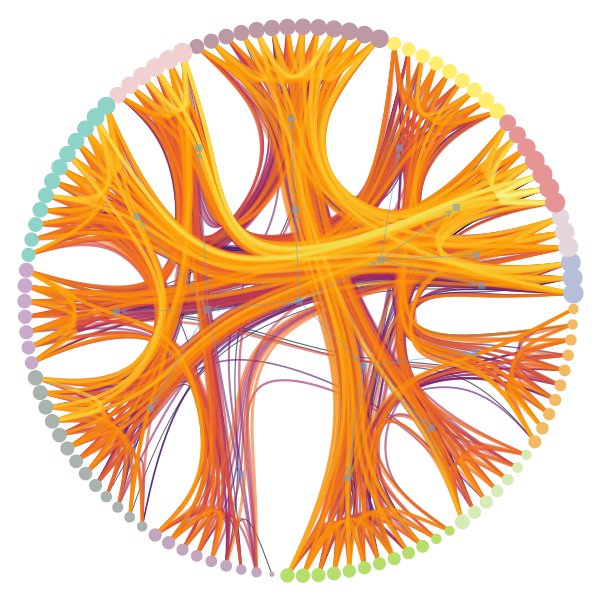

In [22]:
SBM = sbm(graph)
fit = SBM.fitSBM()
SBM.sbmplot(fit)

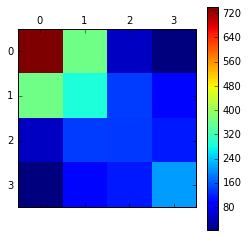

In [23]:
SBM.sbmHeatMap(fit,1)

In [25]:
SBM.blackAssignment(fit)

[PropertyArray([ 0,  0,  3,  2,  2,  2,  9,  2,  4,  5,  6,  0,  0,  7,  2,
                 7,  7,  1,  7,  4,  8,  9, 10, 11,  0,  0,  5,  6,  4,  4,
                12,  7,  2,  6, 10, 11,  5,  5,  4,  4,  5,  6, 12,  9,  8,
                 9,  1,  3,  5,  5,  7,  2, 12,  9, 10,  9,  4,  4,  4,  0,
                12,  6,  5,  6, 12,  6, 10, 11,  0,  3,  8, 11,  8,  9,  5,
                 6, 10,  9,  0,  0,  5,  6, 12,  9, 10, 11, 10, 10, 11,  0,
                 0,  8,  9, 12,  6, 10, 11,  1,  9,  4,  4, 12,  6,  8,  9,
                 8,  6,  4,  4, 12,  9], dtype=int32),
 PropertyArray([0, 1, 1, 1, 0, 3, 3, 0, 0, 2, 0, 3, 1], dtype=int32),
 PropertyArray([0, 0, 0, 0], dtype=int32)]